# Regolith model by Braun et al. (2016)

## Regolith: Why is it so important?

The regolith is the upper most layer at a planet's surface, including Earth. It covers almost all the planet's surface, with layers' thickness  sometimes reaching of tens of meters,
whereas it can also be very thin or even non-existent, i.e., where bedrock is outcropping.

A general definition of regolith = "A general term for the layer or mantle of fragmental and unconsolidated rock material, whether residual or transported and of highly varied character, that nearly everywhere forms the surface of the land and overlies or covers the bedrock. It includes rock debris of all kinds, volcanic ash, glacial drift, alluvium, vium, loess and aeolian deposits, vegetal accumulations tions and soil." *G. Taylor;R. A. Eggleton. Regolith Geology and Geomorphology*

It is also the propagation of a weathering front at depth and the removal or transport of soil at the surface by erosion. Regolith characteristics are key controls on catchment hydrology via inﬁltration of precipitation, resurgence, and evapotranspiration through vegetation cover and vegetation type. (Braun et al. 2016)

Regolith layers are usually subdivided into multiple categories as can be seen in figure 1:

<img src="./assets/Eggleton2001.png" width="75%" height="45%">

*Figure 1: Regolith terminology, general (a) and in an example (b) - Eggleton 2001*

Regolith forming processes are many, some physical and some chemical (Tardy 1990, Nahon 1991, Campy et Macaire 2003). Which is (are?) the driving processe(s) is unclear (Lachassagne 2011): it could be rock fracturing, or chemical weathering through rains, or even bug activity. 

Some other model exist, using different processes as the limiting ones: chemicaly based, physically based or about water kinetics, so the time scale differs, and other models include as many processes as possible making them very complex.

## Article overview and 2016 model

The 2016 regolith formation model is a "simple" numerical model based on thress processes, three equations, and one layer (see figure 2). 

In this model, the assumption is that weathering is the regolith formation process: with rock fracturing, chemical weathering is one of the main processes transforming impermeable bedrock in aquifers. This information is very important as the model depends of the water table. Another important characteristic of the model is the assumption that the weathering front is a finite and contrastful thin layer (Maher 2010), whereas in real profiles, the weathering front is more diffusive, sometimes not interconnected and even multiple weathering fronts at the same time can exist. For the sake of numerical simplification, it is not the fact here. However, this does not make the model less valid (Maher 2010). 


<img src="./assets/Concepts.png" alt="refrego" width="65%" height="35%">

*Figure 2: Simple regolith depiction (a) and 2016 model regolith depiction (b) - Braun et al. 2016*

In this model, we assume that for the formation and evolution of the regolith chemical alteration is the primary mechanism controlling the propagation of the weathering front and also, that it is the ability of the ﬂowing water to keep the system away from saturation that controls the rate of dissolution (Braun et al. 2016). This can be paralleled to the K value, which will be called $K_D$ later on. It is the diffusivity coefficient. When 0, it is assumed that there is no diffusivity, which means that it is assumed that the bedrock is impermeable. When $ K_D > 0 $ and tending to 1, diffusivity increases and the system becomes permeable.  

As can be observed in figure 3, the model is based on three components: surface topography (z), water table height (H) and weathering front depth (B).

<img src="./assets/Rego_parts.png"  width="75%" height="55%">

*Figure 3: Regolith model characteristics - Braun et al. 2016*

These three processes are each defined by equations:
- **Surface processes model**: $$\frac{\partial z}{\partial t} = U + K_D \times \frac{\partial ^2 z}{\partial x^2}$$

With z: topography (in m), t: time (in yrs), U: uplift rate (m/yr), $K_D$: diffusivity coefficient, x: spatial parameter.


- **Chemical model**: $$\frac{\partial B}{\partial t} = F \times v = F \times K \times \frac{\partial H}{\partial x}$$

With B: the weathering front depth (m), t: time (in yrs), F: coefficient, ratio of weathering front velocity over fluid velocity, $v$: fluid velocity (m/sec), K: hydraulic conductivity (m/yr), H: water table height (m), x: spatial parameter.


- **Hydrological model**: $$\frac{\partial}{\partial x} \times [K(H - z + B) \frac{\partial H}{\partial x}] + P_0 = 0$$

With K: hydraulic conductivity (m/yr), H: water table height (m), z: topography (in m), B: the weathering front depth (m), x: spatial parameter, $P_0$: initial precipitation rate (m/yr)



All three models are interconnected as seen in figure 4:

<img src="./assets/3processes.png" width="70%" height="50%">

*Figure 4: The model's three processes - Braun et al. 2016*

For the model, we use the numerical forward difference method. With a value at time step $t_0$, we can determine values at time step $t_{+1}$.

### Surface component z

$$\frac{\partial z}{\partial t} = U + K_D \times \frac{\partial ^2 z}{\partial x^2}$$

In physical and numerical terms, if we want the topography of something, we need to know how the object looked at each time step, be it numerical models as seconds, or physical objects like mountains which evolve through millions of years. For example, by knowing at the present time step what z is, we can define what z will look like at t+1. This is why we need z values to find z in the equation. Another important point, which changes depending on the environment, is the uplift rate. It is a validated parameter which will be given. The same for $K_D$, for simplification purposes, the initial $K_D$ will be 0 (bedrock) or 1 (regolith).

z has two boundary conditions.

### Hydrological component H

$$\frac{\partial}{\partial x} \times [K(H - z + B) \frac{\partial H}{\partial x}] + P_0 = 0$$

As for topography, to know the position of the water table at a time step, we need to know the position of the water table as another step. With the combination of the topographic value at that time and place and weathering front value too, we can define a water table position. Important parameters dependant of the environment are K, which will be given according to the rock's characteristics, and the initial precipitation rate $P_0$ which is dependant on the climatic environment.

H has one boundary condition.

### Chemical component B

$$\frac{\partial B}{\partial t} = F \times v = F \times K \times \frac{\partial H}{\partial x}$$

The same method is used to solve the weathering front depth B. This could be defined by F and $v$ only, but apart from field measurements for $v$, we cannot obtain detailed results for B. Thus, the weathering front depth is directly dependant on water table position. The other factor, F, is a coefficient determined through the environment's and rock's characteristics, including porosity, permeability, type of rock...

B has one boundary condition.

When running, the model computes all three parameters together, in a certain order: first, topography, as it is dependant only of itself, then the hydrological and chemical processes as these are co-dependant and dependant of topography. When updating at each time steps, all three values will be adjusted according to the others.

### Dimensionless numbers

Through these equations, two dimensionless ratios were created by Braun et al. (2016): $\Omega$ and $\Gamma$.

#### Gamma $\Gamma$

$$\Gamma = \frac{K \times S^2}{P_0}  $$

With K: hydraulic conductivity, S: slope, $P_0$: initial precipitation.

In anorogenic areas, the value of $\Gamma$ gives us the geometry of the regolith. 
- If $\Gamma >> 1 $, then the regolith is thickest at the top of the hill. 
- On the other hand, if $\Gamma << 1$, the regolith is thickest at the bottom of the hill. 
- If $\Gamma > 4$, then the surface of the water table, thus the weathering profile, is convex. 
- If $\Gamma <4 $, then the water table gemoetry, thus the weathering front geometry, is concave.

Both behaviours can be observed in nature.

#### Omega $\Omega$

$$\Omega = \frac{F \times K \times S}{\dot{E}}$$

With F: coefficient, ratio of weathering front velocity over fluid velocity, K: hydraulic conductivity, S: slope, $\dot{E}$: erosion rate

In orogenic areas, the situation is different, and both $\Gamma$ and $\Omega$ are needed. The value of $\Omega$ hints upon regolith presence (assuming steady state): 
- If $0.5 < \Omega < 1$, regolith formation is limited at the lower parts of the topography.
- If $\Omega > 1$, there will be regolith at the top of the hill/topography.

Geometry of the profile in orogenic environments does not only depend on $\Gamma$, but also on $\Omega$: $$ \Gamma \lessgtr \frac{\Omega^2}{\Omega - 1}$$
- If $\Gamma < \Omega$ ratio, then thickest regolith layers are at the base of the hill, 
- If $\Gamma > \Omega$ ratio, then the regolith is thickest at the top of the hill. 

This also means that if the system closes up on the limit where $\Omega$ tends to 1, the conditions create a better environment for thickest regolith at the base. However, if it is far from the limit, which means that $\Omega$ >> 1, then for the regolith to be thickest at the base of the hill, the condition $\Omega > \Gamma$ must be met.

#### Dimensionless numbers in natural cases

<img src="./assets/Examples.png"  width="60%" height="30%">

*Figure: Examples in three scenarios - Braun et al. 2016*

What would be the values for $\Omega$ and $\Gamma$ in those three cases (one on the left, two on the right):

<p>
  <img src="./assets/namibia.jpeg" width="450" />
  <img src="./assets/Alps.jpg" width="398" /> 
</p>

## Framework Model: characteristics

#### Comparison: What we use VS what is hidden behind

Whatwe learn during this workshop is to use tools. These tools can only work with a foundation. This foundation are the .py files. In those is written how the model works and why it runs as it does. All summoned parameters come from such a file. For example, while using the Fastscape basic model, we imported everything, without really knowing what is inside. Now, we will work the regolith model, which was created by Jean Braun and implemented into Xarray Simlab by Jean Braun and Caroline Fenske. This means that we can look at the .py file behind the model.

#### 1D Model

It is an implementation of the Regolith model 2016. The added features are about duricrust formation, however, we will not work with it for now. The final goal is to put the regolith and duricrusts models into Fastscape.

In [5]:
import numpy as np
import xsimlab as xs
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
import xarray as xr
import dask
import scipy.signal as sg
import zarr

# plt.style.use("dark_background")
%load_ext xsimlab.ipython

As we did before, we will call upon the model through the import command:

In [8]:
from duricrust import regolith_model
model = regolith_model

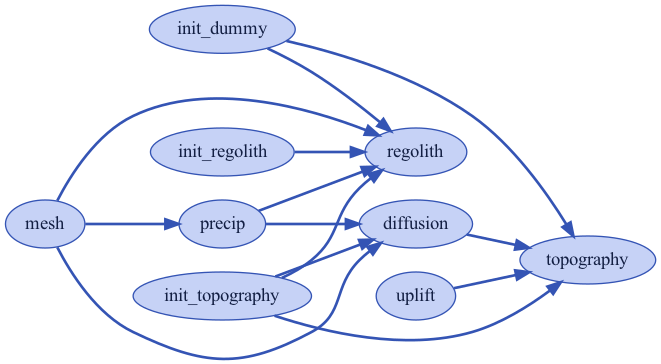

In [9]:
model.visualize(show_inputs=False)

#### 2D Model: a sneak peek

*Example of the 2D model, in preparation.*

#### Slope and topography

When looking at the model, a process you can see determines the initial topography. If we want to add a specific topography the model should work with, then we can drop the process: model.drop_processes('init_topography').

This can be a useful tool when dealing with more complexe topographies than "simple hills".

#### Weathering and sediment fluxes

While in the basic version "regolith_model", fluxes, redidence time and regolith age cannot be computed. However, while using one of the duricrsust models, for example the "water_table_model":

In [14]:
from duricrust import water_table_model
WTmodel = water_table_model

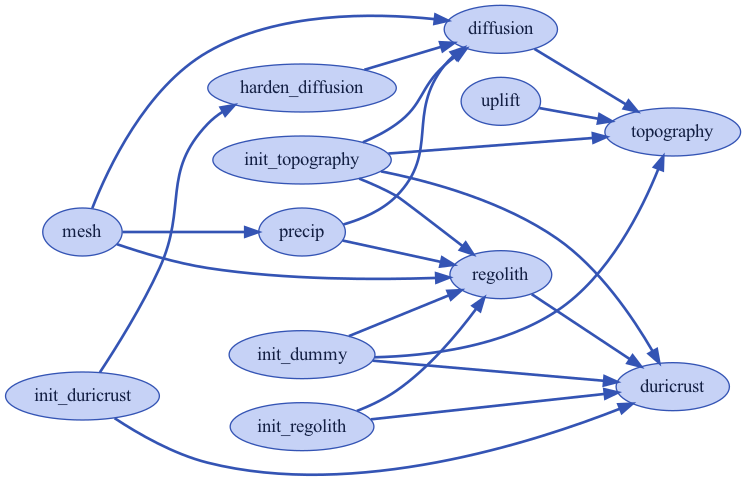

In [21]:
WTmodel.visualize()

In [29]:
#WTmodel.visualize(show_variables=True)

Weathering and sediment fluxes are determined using erosion and weathering rates. However, these two variables are not present in the model itself, which means that if we want to analyse them, we need to use the XarraySimlab framework. We will need: uplift rate, weathering front depth and topography as basis.  It will look like this:

#### Residence time in the regolith and in water

As for the fluxes, residence time of particles in the regolith is not computed direclty by the model. However it can also be done by calculation of data arrays while using the framework. Defining the residence time is the time a particle stays in the regolith and how long it stays in water, which means that we need to check at every time step where the particle is. Thus, we need a "for" loop. We start by defining two values, the regolith residence time and the water residence time.

Both are arrays full of 0 at the beginning.

Now comes the for loop: for i and t, we enumarate on the defined out clock

We will compute residence times together in the next notebook.

#### Regolith age

There are multiple methods to date regolith, so we can determine certain ages in real life. This very useful data to calibrate a model. An important fact is the assumption that regolith formation happens with weathering, and weathering starts at the top and then the weathering front lowers. This means, that regolith age should get younger with depth. 

For the regolith formation model presented here, regolith age can be found depending on those 2 facts: the regolith thickness and the position of the weathering front. As for the residence time, we will need a for loop.

#### Bonus: Solubility

We use the Arrhenius equation, which is a formula for tempearture dependance of reaction rates. $$k=A \times \exp{\frac{-E_{\rm{a}}}{k_{\rm{B}}\times T}}$$
with:
- k, the rate constant
- A, the pre-exponential factor
- $E_a$, activation energy  
- $k_B$, the Boltzmann constant  
- T, absolute temperature

The Arrhenius equation can be used to determine temperature variations in diffusion coefficients for example. Here, it is used to check if how temperature could influence our model.

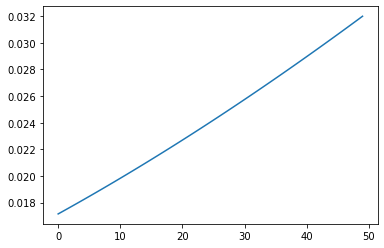

In [25]:
plt.plot(np.exp(-1107/(274+np.linspace(0,50))-0.0254));